In [1]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from terbilang import Terbilang
#import tweepy 
#from tweepy import OAuthHandler 
#from textblob import TextBlob 
from wordcloud import WordCloud

In [2]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
 #       print(os.path.join(dirname, filename))

In [3]:
#stopwords_path = "/kaggle/input/stop-words-in-28-languages/indonesian.txt"
#stopwords = get_stopwords_list(stopwords_path)

stopwordbahasa = pd.read_csv('stopwordbahasa.csv', encoding = 'ISO-8859-1', names=['stopword'])
stopwordbahasa.head()

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [4]:
#data
df = pd.read_csv('data1.csv', encoding = 'ISO-8859-1', delimiter=",")
#df.head(6)

In [5]:
df1 = pd.read_csv('new_kamusalay.csv', encoding = 'ISO-8859-1', names=['old', 'new'])

In [6]:
#to print complete sentence
pd.options.display.max_colwidth = 500

In [7]:
df_new=df.copy()

In [8]:
#remove Rt, Url
df_new['Tweet'] = df_new['Tweet'].str.replace('RT', ' ', regex=True)
#df_new['Tweet'] = df_new['Tweet'].str.replace('URL', ' ', regex=True)
#df_new['Tweet'] = df_new['Tweet'].str.replace('Url\S+', ' ', regex=True)

In [9]:
#remove #, @
df_new['Tweet'] = df_new['Tweet'].str.replace(r'#\S+',' ' , regex=True)
df_new['Tweet'] = df_new['Tweet'].str.replace(r'@\S+', ' ', regex=True)
df_new['Tweet'] = df_new['Tweet'].str.replace(r'@', ' ', regex=True)

In [10]:
#remove https to ' ' #remove the extra spaces so there's only one space between words
df_new['Tweet'] = df_new['Tweet'].str.replace(r'http:\S+', ' ', regex=True)
df_new['Tweet']= df_new['Tweet'].str.replace(r'https:', '',regex = True)
df_new['Tweet']= df_new['Tweet'].str.replace(r'Https:', '',regex = True)

In [11]:
#delete \n
df_new['Tweet'] = df_new['Tweet'].str.replace(r'\\n', ' ', regex=True)
df_new['Tweet'] = df_new['Tweet'].str.replace(r'&amp;', 'dan', regex=True)

In [12]:
#remove emoticon
df_new['Tweet'] = df_new['Tweet'].str.replace(r'(\\x(.){2})', ' ', regex=True)
df_new.head(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0
1,USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0


In [13]:
#remove non alphanumeric
df_new['Tweet'] = df_new['Tweet'].str.replace(r'[^a-zA-Z0-9&/+]', ' ', regex=True)
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego,1,1,1,0,0,0,0,0,1,1,0,0
1,USER USER siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga,0,1,0,0,0,0,0,0,0,0,0,0
2,41 Kadang aku berfikir kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali kali Kadang aku merasa Tuhan itu ninggalkan aku sendirian Ketika orangtuaku berencana berpisah ketika kakakku lebih memilih jadi Kristen Ketika aku anak ter,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu congor lu yg sekate2 anjyng,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu g lagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#remove all space
df_new['Tweet']=df_new['Tweet'].str.replace(r'\s+', ' ', regex=True)
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego,1,1,1,0,0,0,0,0,1,1,0,0
1,USER USER siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga,0,1,0,0,0,0,0,0,0,0,0,0
2,41 Kadang aku berfikir kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali kali Kadang aku merasa Tuhan itu ninggalkan aku sendirian Ketika orangtuaku berencana berpisah ketika kakakku lebih memilih jadi Kristen Ketika aku anak ter,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu congor lu yg sekate2 anjyng,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu g lagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#Split data
def split_sentence(sentence):
    return re.findall(r'\b\w+\b', str(sentence))

df_new['Split_new']=df_new['Tweet'].apply(lambda x: split_sentence(x.lower()))

In [16]:
#create the list of split tweet
isi=[]
for index, row in df_new.iterrows():
    isi.append(row['Split_new'])

isi

[['disaat',
  'semua',
  'cowok',
  'berusaha',
  'melacak',
  'perhatian',
  'gue',
  'loe',
  'lantas',
  'remehkan',
  'perhatian',
  'yg',
  'gue',
  'kasih',
  'khusus',
  'ke',
  'elo',
  'basic',
  'elo',
  'cowok',
  'bego'],
 ['user',
  'user',
  'siapa',
  'yang',
  'telat',
  'ngasih',
  'tau',
  'elu',
  'edan',
  'sarap',
  'gue',
  'bergaul',
  'dengan',
  'cigax',
  'jifla',
  'calis',
  'sama',
  'siapa',
  'noh',
  'licew',
  'juga'],
 ['41',
  'kadang',
  'aku',
  'berfikir',
  'kenapa',
  'aku',
  'tetap',
  'percaya',
  'pada',
  'tuhan',
  'padahal',
  'aku',
  'selalu',
  'jatuh',
  'berkali',
  'kali',
  'kadang',
  'aku',
  'merasa',
  'tuhan',
  'itu',
  'ninggalkan',
  'aku',
  'sendirian',
  'ketika',
  'orangtuaku',
  'berencana',
  'berpisah',
  'ketika',
  'kakakku',
  'lebih',
  'memilih',
  'jadi',
  'kristen',
  'ketika',
  'aku',
  'anak',
  'ter'],
 ['user',
  'user',
  'aku',
  'itu',
  'aku',
  'ku',
  'tau',
  'matamu',
  'sipit',
  'tapi',
  'dili

In [17]:
#stopword_bahasa[]

#create the list of split tweet
#stop_list=[]
#for index, row in stopwordbahasa.iterrows():
#    stop_list.append(row['stopword'])
    
#stop_list

In [18]:
t = Terbilang()

titip=[]

for ch in isi:
    titip1=[]
    for ab in ch:
        if ab.isdigit()==True :
            ab = t.parse(ab).getresult()
            #ab = ab.getresult()
            #print(ch)
        else:
            ab = ab
        titip1.append(ab)
    titip.append(titip1)

titip

[['disaat',
  'semua',
  'cowok',
  'berusaha',
  'melacak',
  'perhatian',
  'gue',
  'loe',
  'lantas',
  'remehkan',
  'perhatian',
  'yg',
  'gue',
  'kasih',
  'khusus',
  'ke',
  'elo',
  'basic',
  'elo',
  'cowok',
  'bego'],
 ['user',
  'user',
  'siapa',
  'yang',
  'telat',
  'ngasih',
  'tau',
  'elu',
  'edan',
  'sarap',
  'gue',
  'bergaul',
  'dengan',
  'cigax',
  'jifla',
  'calis',
  'sama',
  'siapa',
  'noh',
  'licew',
  'juga'],
 ['empat puluh satu',
  'kadang',
  'aku',
  'berfikir',
  'kenapa',
  'aku',
  'tetap',
  'percaya',
  'pada',
  'tuhan',
  'padahal',
  'aku',
  'selalu',
  'jatuh',
  'berkali',
  'kali',
  'kadang',
  'aku',
  'merasa',
  'tuhan',
  'itu',
  'ninggalkan',
  'aku',
  'sendirian',
  'ketika',
  'orangtuaku',
  'berencana',
  'berpisah',
  'ketika',
  'kakakku',
  'lebih',
  'memilih',
  'jadi',
  'kristen',
  'ketika',
  'aku',
  'anak',
  'ter'],
 ['user',
  'user',
  'aku',
  'itu',
  'aku',
  'ku',
  'tau',
  'matamu',
  'sipit',
  '

In [19]:
#check with stop word
temporary1=[]
for tweetss in titip:
    #results = ""
    tmp =[]
    for abc in tweetss:
        try:
            trying1 = np.where(stopwordbahasa['stopword']==abc)[0][0]
            abc = " "#np.delete(trying1, 1)
        except:
            abc = abc
            tmp.append(abc)
        #results = results + " " + abc
    temporary1.append(tmp)
#     print(result)

temporary1

[['disaat',
  'cowok',
  'berusaha',
  'melacak',
  'perhatian',
  'gue',
  'loe',
  'lantas',
  'remehkan',
  'perhatian',
  'yg',
  'gue',
  'kasih',
  'khusus',
  'elo',
  'basic',
  'elo',
  'cowok',
  'bego'],
 ['user',
  'user',
  'telat',
  'ngasih',
  'tau',
  'elu',
  'edan',
  'sarap',
  'gue',
  'bergaul',
  'cigax',
  'jifla',
  'calis',
  'noh',
  'licew'],
 ['empat puluh satu',
  'kadang',
  'berfikir',
  'percaya',
  'tuhan',
  'jatuh',
  'berkali',
  'kali',
  'kadang',
  'tuhan',
  'ninggalkan',
  'orangtuaku',
  'berencana',
  'berpisah',
  'kakakku',
  'memilih',
  'kristen',
  'anak',
  'ter'],
 ['user', 'user', 'ku', 'tau', 'matamu', 'sipit', 'diliat'],
 ['user',
  'user',
  'kaum',
  'cebong',
  'kapir',
  'udah',
  'keliatan',
  'dongoknya',
  'dongok',
  'hahahah'],
 ['user', 'ya', 'bani', 'taplak', 'dkk'],
 ['deklarasi',
  'pilkada',
  'dua ribu delapan belas',
  'aman',
  'anti',
  'hoax',
  'warga',
  'dukuh',
  'sari',
  'jabon'],
 ['gue',
  'aja',
  'kelar'

In [20]:
#check with kamus alay
temporary=[]
for tweets in temporary1:
    result = ""
    temp =[]
    for tweet in tweets:
        try:
            trying = np.where(df1['old']==tweet)[0][0]
            tweet = df1['new'].iloc[trying]
        except:
            tweet = tweet
        temp.append(tweet)
        result = result + " " + tweet
    temporary.append(result)
#     print(result)

temporary

[' di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego',
 ' pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew',
 ' empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter',
 ' pengguna pengguna ku tau matamu sipit dilihat',
 ' pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha',
 ' pengguna ya bani taplak dan kawan kawan',
 ' deklarasi pilihan kepala daerah dua ribu delapan belas aman anti hoaks warga dukuh sari jabon',
 ' gue saja selesai re watch aldnoah zero kampret memang akhirnya karakter utama cowoknya kena friendzone bro xd uniform resource locator',
 ' admin belanja port terbaik nak makan ais kepal milo ais kepal horlicks cendol toping kau kau doket mana itu gerai rozak mertuaku taipan kembar baby romantika bank islam senawang',
 ' pengguna enak

In [21]:
#data dalam bentuk data frame
df_copynewnew = df_new
df_copynewnew['Tweet'] = temporary
df_copynewnew


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new
0,di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,"[disaat, semua, cowok, berusaha, melacak, perhatian, gue, loe, lantas, remehkan, perhatian, yg, gue, kasih, khusus, ke, elo, basic, elo, cowok, bego]"
1,pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew,0,1,0,0,0,0,0,0,0,0,0,0,"[user, user, siapa, yang, telat, ngasih, tau, elu, edan, sarap, gue, bergaul, dengan, cigax, jifla, calis, sama, siapa, noh, licew, juga]"
2,empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter,0,0,0,0,0,0,0,0,0,0,0,0,"[41, kadang, aku, berfikir, kenapa, aku, tetap, percaya, pada, tuhan, padahal, aku, selalu, jatuh, berkali, kali, kadang, aku, merasa, tuhan, itu, ninggalkan, aku, sendirian, ketika, orangtuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, aku, anak, ter]"
3,pengguna pengguna ku tau matamu sipit dilihat,0,0,0,0,0,0,0,0,0,0,0,0,"[user, user, aku, itu, aku, ku, tau, matamu, sipit, tapi, diliat, dari, mana, itu, aku]"
4,pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[user, user, kaum, cebong, kapir, udah, keliatan, dongoknya, dari, awal, tambah, dongok, lagi, hahahah]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,pengguna berbicara ndasmu congor kamu yang sekata kata anjing,1,1,1,0,0,0,1,0,0,1,0,0,"[user, jangan, asal, ngomong, ndasmu, congor, lu, yg, sekate2, anjyng]"
13165,pengguna kasur enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,"[user, kasur, mana, enak, kunyuk]"
13166,pengguna hati hati bisu tidak bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,"[user, hati, hati, bisu, g, lagi, bosan, huft]"
13167,pengguna pengguna pengguna pengguna bom real mudah terdeteksi bom terkubur dahsyat ledakannya revolusi jiwa,0,0,0,0,0,0,0,0,0,0,0,0,"[user, user, user, user, bom, yang, real, mudah, terdeteksi, bom, yang, terkubur, suatu, saat, lebih, dahsyat, ledakannya, itulah, di, sebut, revolusi, jiwa]"


In [22]:
#data udah clean dan di split
df_copynew1=df_copynewnew
def split_sentence(sentence):
    return re.findall(r'\b\w+\b', str(sentence))

df_copynew1['Split_new']=df_copynew1['Tweet'].apply(lambda x: split_sentence(x.lower()))
df_copynew1

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new
0,di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,"[di, saat, cowok, berusaha, melacak, perhatian, gue, kamu, lantas, remehkan, perhatian, yang, gue, kasih, khusus, kamu, basic, kamu, cowok, bego]"
1,pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, telat, memberi, tau, kamu, edan, sarap, gue, bergaul, cigax, jifla, calis, itu, licew]"
2,empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter,0,0,0,0,0,0,0,0,0,0,0,0,"[empat, puluh, satu, kadang, berpikir, percaya, tuhan, jatuh, berkali, kali, kadang, tuhan, meninggalkan, orang, tuaku, berencana, berpisah, kakakku, memilih, kristen, anak, ter]"
3,pengguna pengguna ku tau matamu sipit dilihat,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, ku, tau, matamu, sipit, dilihat]"
4,pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[pengguna, pengguna, kaum, cebong, kafir, sudah, kelihatan, dongoknya, dungu, haha]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,pengguna berbicara ndasmu congor kamu yang sekata kata anjing,1,1,1,0,0,0,1,0,0,1,0,0,"[pengguna, berbicara, ndasmu, congor, kamu, yang, sekata, kata, anjing]"
13165,pengguna kasur enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, kasur, enak, kunyuk]"
13166,pengguna hati hati bisu tidak bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, hati, hati, bisu, tidak, bosan, duh]"
13167,pengguna pengguna pengguna pengguna bom real mudah terdeteksi bom terkubur dahsyat ledakannya revolusi jiwa,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, pengguna, pengguna, bom, real, mudah, terdeteksi, bom, terkubur, dahsyat, ledakannya, revolusi, jiwa]"


# Sentiment analysis

In [23]:
endresult = None

In [24]:
endresult = df_copynew1

# endresult["Tweet"][1]

pol = []
for i in range(len(endresult['Tweet'])):
    HS = endresult['HS'][i]
    HG = endresult['HS_Group'][i]
    Hstrong = endresult['HS_Strong'][i]
    Hreli = endresult['HS_Religion'][i]
    Hrace = endresult['HS_Race'][i]
    Hphy = endresult['HS_Physical'][i]
    Abusive = endresult['Abusive'][i]
    Hind = endresult['HS_Individual'][i]
    Hother = endresult['HS_Other'][i]
    Hgen = endresult['HS_Gender'][i]
    Hweak = endresult['HS_Weak'][i]
    
    negative = ((HS==1) and ((HG==1) or (Hstrong==1) or (Hreli==1) or (Hrace==1) or (Hphy==1))) or (Abusive==1)
    neutral = (HS==1) and ((Hind==1) or (Hother==1) or (Hgen==1) or (Hweak==1)) and (Abusive==0)
    positive = (HS==0) and (Abusive==0)
    
    if negative : 
        pol.append("Negative")
    elif positive : 
        pol.append("Positive")
    else:
        pol.append("Neutral")
    

endresult.insert(0, "Polarity", pol, True)
endresult.head()

,Polarity,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new
0,Negative,di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,"[di, saat, cowok, berusaha, melacak, perhatian, gue, kamu, lantas, remehkan, perhatian, yang, gue, kasih, khusus, kamu, basic, kamu, cowok, bego]"
1,Negative,pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, telat, memberi, tau, kamu, edan, sarap, gue, bergaul, cigax, jifla, calis, itu, licew]"
2,Positive,empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter,0,0,0,0,0,0,0,0,0,0,0,0,"[empat, puluh, satu, kadang, berpikir, percaya, tuhan, jatuh, berkali, kali, kadang, tuhan, meninggalkan, orang, tuaku, berencana, berpisah, kakakku, memilih, kristen, anak, ter]"
3,Positive,pengguna pengguna ku tau matamu sipit dilihat,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, ku, tau, matamu, sipit, dilihat]"
4,Negative,pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[pengguna, pengguna, kaum, cebong, kafir, sudah, kelihatan, dongoknya, dungu, haha]"


In [25]:
#len(endresult[(endresult['Polarity']=='Negative')])

#newdata[(newdata['Polarity']=='Negative') & (newdata['HS']==1)]

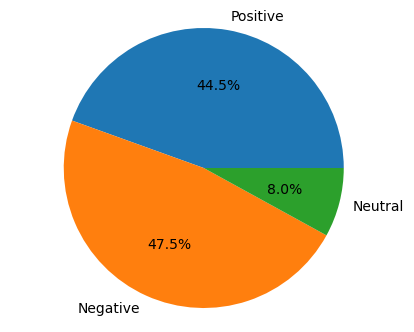

In [26]:
pieLabels=["Positive","Negative","Neutral"]

#populationShare=endresult['Polarity']

population_negative=len(endresult[(endresult['Polarity']=='Negative')])
population_neutral=len(endresult[(endresult['Polarity']=='Neutral')])
population_positive=len(endresult[(endresult['Polarity']=='Positive')])

total = population_negative + population_neutral + population_positive
percent_negative = (population_negative / total) * 100
percent_positive = (population_positive / total) * 100
percent_neutral = (population_neutral / total) * 100


fig = plt.figure(figsize =(5, 4))
plt.pie([population_positive, population_negative, population_neutral], labels = pieLabels, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

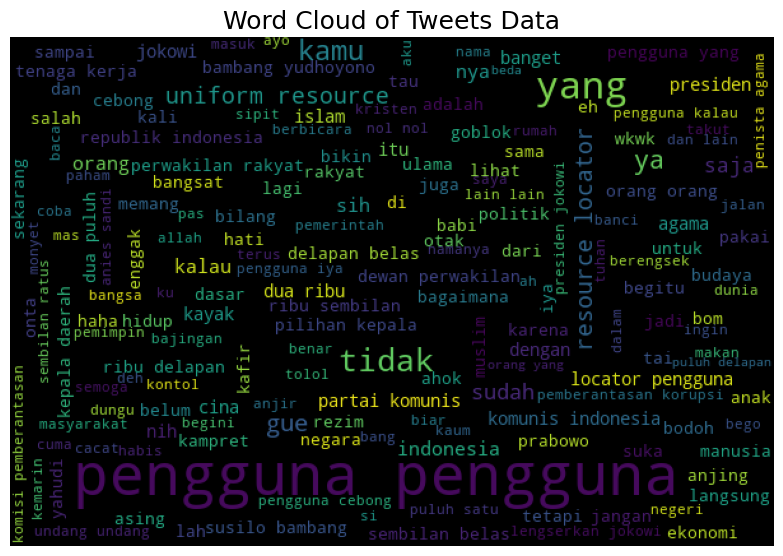

In [27]:
# Visualize word cloud

list_words=''
for tweet in endresult['Split_new']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

# Descriptive analysis for data

In [28]:
#cek 5 data teratas
endresult.head()

,Polarity,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new
0,Negative,di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,"[di, saat, cowok, berusaha, melacak, perhatian, gue, kamu, lantas, remehkan, perhatian, yang, gue, kasih, khusus, kamu, basic, kamu, cowok, bego]"
1,Negative,pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, telat, memberi, tau, kamu, edan, sarap, gue, bergaul, cigax, jifla, calis, itu, licew]"
2,Positive,empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter,0,0,0,0,0,0,0,0,0,0,0,0,"[empat, puluh, satu, kadang, berpikir, percaya, tuhan, jatuh, berkali, kali, kadang, tuhan, meninggalkan, orang, tuaku, berencana, berpisah, kakakku, memilih, kristen, anak, ter]"
3,Positive,pengguna pengguna ku tau matamu sipit dilihat,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, ku, tau, matamu, sipit, dilihat]"
4,Negative,pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[pengguna, pengguna, kaum, cebong, kafir, sudah, kelihatan, dongoknya, dungu, haha]"


In [29]:
#cek 5 data terbawah
endresult.tail()

,Polarity,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new
13164,Negative,pengguna berbicara ndasmu congor kamu yang sekata kata anjing,1,1,1,0,0,0,1,0,0,1,0,0,"[pengguna, berbicara, ndasmu, congor, kamu, yang, sekata, kata, anjing]"
13165,Negative,pengguna kasur enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, kasur, enak, kunyuk]"
13166,Positive,pengguna hati hati bisu tidak bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, hati, hati, bisu, tidak, bosan, duh]"
13167,Positive,pengguna pengguna pengguna pengguna bom real mudah terdeteksi bom terkubur dahsyat ledakannya revolusi jiwa,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, pengguna, pengguna, bom, real, mudah, terdeteksi, bom, terkubur, dahsyat, ledakannya, revolusi, jiwa]"
13168,Negative,pengguna situ memberi foto ya kutil onta,1,1,1,0,0,0,0,0,1,1,0,0,"[pengguna, situ, memberi, foto, ya, kutil, onta]"


In [30]:
#cek jumlah kolom
endresult.shape

(13169, 15)

In [31]:
#cek total duplikat data
endresult.isna().sum()/endresult.shape[0]

Polarity         0.0
Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
Split_new        0.0
dtype: float64

In [32]:
#create new column total character
endresult['total_char']=endresult['Tweet'].apply(len)
endresult

,Polarity,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new,total_char
0,Negative,di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,"[di, saat, cowok, berusaha, melacak, perhatian, gue, kamu, lantas, remehkan, perhatian, yang, gue, kasih, khusus, kamu, basic, kamu, cowok, bego]",125
1,Negative,pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, telat, memberi, tau, kamu, edan, sarap, gue, bergaul, cigax, jifla, calis, itu, licew]",92
2,Positive,empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter,0,0,0,0,0,0,0,0,0,0,0,0,"[empat, puluh, satu, kadang, berpikir, percaya, tuhan, jatuh, berkali, kali, kadang, tuhan, meninggalkan, orang, tuaku, berencana, berpisah, kakakku, memilih, kristen, anak, ter]",156
3,Positive,pengguna pengguna ku tau matamu sipit dilihat,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, ku, tau, matamu, sipit, dilihat]",46
4,Negative,pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[pengguna, pengguna, kaum, cebong, kafir, sudah, kelihatan, dongoknya, dungu, haha]",73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,Negative,pengguna berbicara ndasmu congor kamu yang sekata kata anjing,1,1,1,0,0,0,1,0,0,1,0,0,"[pengguna, berbicara, ndasmu, congor, kamu, yang, sekata, kata, anjing]",62
13165,Negative,pengguna kasur enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, kasur, enak, kunyuk]",27
13166,Positive,pengguna hati hati bisu tidak bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, hati, hati, bisu, tidak, bosan, duh]",40
13167,Positive,pengguna pengguna pengguna pengguna bom real mudah terdeteksi bom terkubur dahsyat ledakannya revolusi jiwa,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, pengguna, pengguna, bom, real, mudah, terdeteksi, bom, terkubur, dahsyat, ledakannya, revolusi, jiwa]",108


In [33]:
# len
endresult['Tweet'].apply(len)

0        125
1         92
2        156
3         46
4         73
        ... 
13164     62
13165     27
13166     40
13167    108
13168     41
Name: Tweet, Length: 13169, dtype: int64

In [34]:
#total word 
endresult['total_word'] = endresult['Tweet'].apply(lambda sent: len(sent.split()))
endresult

,Polarity,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Split_new,total_char,total_word
0,Negative,di saat cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus kamu basic kamu cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,"[di, saat, cowok, berusaha, melacak, perhatian, gue, kamu, lantas, remehkan, perhatian, yang, gue, kasih, khusus, kamu, basic, kamu, cowok, bego]",125,20
1,Negative,pengguna pengguna telat memberi tau kamu edan sarap gue bergaul cigax jifla calis itu licew,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, telat, memberi, tau, kamu, edan, sarap, gue, bergaul, cigax, jifla, calis, itu, licew]",92,15
2,Positive,empat puluh satu kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter,0,0,0,0,0,0,0,0,0,0,0,0,"[empat, puluh, satu, kadang, berpikir, percaya, tuhan, jatuh, berkali, kali, kadang, tuhan, meninggalkan, orang, tuaku, berencana, berpisah, kakakku, memilih, kristen, anak, ter]",156,22
3,Positive,pengguna pengguna ku tau matamu sipit dilihat,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, ku, tau, matamu, sipit, dilihat]",46,7
4,Negative,pengguna pengguna kaum cebong kafir sudah kelihatan dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,"[pengguna, pengguna, kaum, cebong, kafir, sudah, kelihatan, dongoknya, dungu, haha]",73,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,Negative,pengguna berbicara ndasmu congor kamu yang sekata kata anjing,1,1,1,0,0,0,1,0,0,1,0,0,"[pengguna, berbicara, ndasmu, congor, kamu, yang, sekata, kata, anjing]",62,9
13165,Negative,pengguna kasur enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,"[pengguna, kasur, enak, kunyuk]",27,4
13166,Positive,pengguna hati hati bisu tidak bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, hati, hati, bisu, tidak, bosan, duh]",40,7
13167,Positive,pengguna pengguna pengguna pengguna bom real mudah terdeteksi bom terkubur dahsyat ledakannya revolusi jiwa,0,0,0,0,0,0,0,0,0,0,0,0,"[pengguna, pengguna, pengguna, pengguna, bom, real, mudah, terdeteksi, bom, terkubur, dahsyat, ledakannya, revolusi, jiwa]",108,14


In [35]:
#mean dari total char dan total word
endresult.mean()

C:\Users\Fyalisia\AppData\Local\Temp\ipykernel_14964\622223782.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  endresult.mean()


HS                0.422280
Abusive           0.382945
HS_Individual     0.271471
HS_Group          0.150809
HS_Religion       0.060217
HS_Race           0.042980
HS_Physical       0.024527
HS_Gender         0.023236
HS_Other          0.284000
HS_Weak           0.256891
HS_Moderate       0.129471
HS_Strong         0.035918
total_char       97.903030
total_word       13.939555
dtype: float64

In [36]:
#median dari total char dan total word
endresult.median()

C:\Users\Fyalisia\AppData\Local\Temp\ipykernel_14964\4004917503.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  endresult.median()


HS                0.0
Abusive           0.0
HS_Individual     0.0
HS_Group          0.0
HS_Religion       0.0
HS_Race           0.0
HS_Physical       0.0
HS_Gender         0.0
HS_Other          0.0
HS_Weak           0.0
HS_Moderate       0.0
HS_Strong         0.0
total_char       86.0
total_word       12.0
dtype: float64

In [37]:
sum(endresult['total_char'])

1289285

In [38]:
sum(endresult['total_word'])

183570

In [39]:
#mode dari total char
endresult['total_char'].mode()

0    62
Name: total_char, dtype: int64

In [40]:
#mode dari total word
endresult['total_word'].mode()

0    6
Name: total_word, dtype: int64

In [41]:
#range total word
range_total_word= endresult['total_word'].max() - endresult['total_word'].min()
range_total_word

78

In [42]:
#range total char
range_total_char= endresult['total_char'].max() - endresult['total_char'].min()
range_total_char

506

In [43]:
#IQR
#cari total minimum
p0 = endresult['total_char'].min()
p0

0

In [44]:
#cari total maksimum
p01 = endresult['total_char'].max()
p01

506

In [45]:
#quartile 1
q1=endresult['total_char'].quantile(0.25)
q1

52.0

In [46]:
#quartile 2
q2=endresult['total_char'].quantile(0.5)
q2

86.0

In [47]:
#quartile 3
q3=endresult['total_char'].quantile(0.75)
q3

131.0

In [48]:
iqr=q3-q1
iqr

79.0

In [49]:
#quartile 1
q11=endresult['total_word'].quantile(0.25)
q11

8.0

In [50]:
#quartile 2
q21=endresult['total_word'].quantile(0.5)
q21

12.0

In [51]:
#quartile 3
q31=endresult['total_word'].quantile(0.75)
q31

18.0

In [52]:
iqr1=q31-q11
iqr1

10.0

In [53]:
# batas bawah
lower_limit=q1-1.5*iqr
lower_limit

-66.5

In [54]:
# batas atas
upper_limit=q3-1.5*iqr
upper_limit

12.5

In [55]:
#outlier
if lower_limit <p0:
    print('Tidak ada outlier dari sisi batas bawah')
else :
    print('Ada outlier dari sisi batas bawah')

Tidak ada outlier dari sisi batas bawah


In [56]:
#outlier
if upper_limit >p01:
    print('Tidak ada outlier dari sisi batas bawah')
else :
    print('Ada outlier dari sisi batas bawah')

Ada outlier dari sisi batas bawah


In [57]:
# variance
endresult.var()

C:\Users\Fyalisia\AppData\Local\Temp\ipykernel_14964\896982090.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  endresult.var()


HS                  0.243978
Abusive             0.236316
HS_Individual       0.197789
HS_Group            0.128075
HS_Religion         0.056595
HS_Race             0.041136
HS_Physical         0.023928
HS_Gender           0.022698
HS_Other            0.203360
HS_Weak             0.190913
HS_Moderate         0.112717
HS_Strong           0.034630
total_char       3512.764366
total_word         72.273078
dtype: float64

In [58]:
# standart deviation
endresult.std()

C:\Users\Fyalisia\AppData\Local\Temp\ipykernel_14964\1863631295.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  endresult.std()


HS                0.493941
Abusive           0.486123
HS_Individual     0.444735
HS_Group          0.357876
HS_Religion       0.237898
HS_Race           0.202819
HS_Physical       0.154685
HS_Gender         0.150659
HS_Other          0.450954
HS_Weak           0.436935
HS_Moderate       0.335733
HS_Strong         0.186092
total_char       59.268578
total_word        8.501357
dtype: float64

In [59]:
# visualization
endresult.skew()

C:\Users\Fyalisia\AppData\Local\Temp\ipykernel_14964\2620139507.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  endresult.skew()


HS               0.314743
Abusive          0.481659
HS_Individual    1.027865
HS_Group         1.951762
HS_Religion      3.697803
HS_Race          4.507363
HS_Physical      6.148549
HS_Gender        6.329997
HS_Other         0.958113
HS_Weak          1.112960
HS_Moderate      2.207621
HS_Strong        4.988423
total_char       1.057653
total_word       1.178742
dtype: float64

In [60]:
# visualization
endresult.kurtosis()

C:\Users\Fyalisia\AppData\Local\Temp\ipykernel_14964\1397631020.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  endresult.kurtosis()


HS               -1.901226
Abusive          -1.768273
HS_Individual    -0.943638
HS_Group          1.809650
HS_Religion      11.675521
HS_Race          18.319105
HS_Physical      35.810092
HS_Gender        38.074647
HS_Other         -1.082184
HS_Weak          -0.761437
HS_Moderate       2.874027
HS_Strong        22.887838
total_char        1.300256
total_word        1.900703
dtype: float64

Text(0.5, 1.0, 'Total Character')

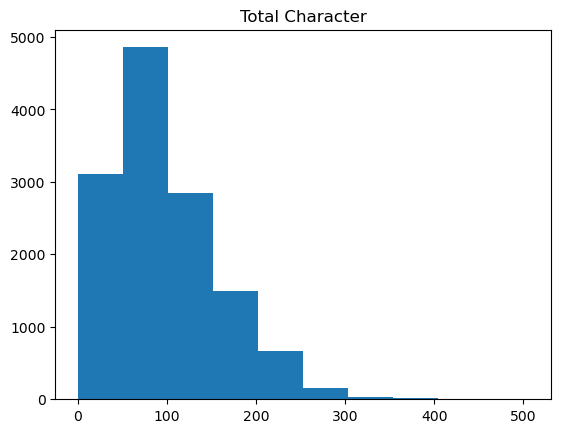

In [61]:
#histogram penyebaran jumlah kharakter
plt.hist(endresult['total_char'])
plt.title('Total Character')

Text(0.5, 1.0, 'Total Word')

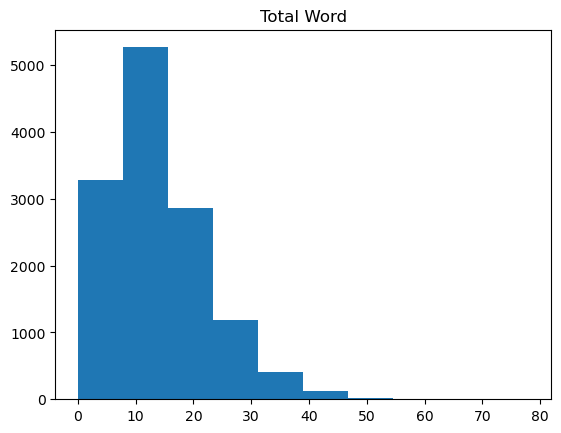

In [62]:
#histogram penyebaran jumlah word
plt.hist(endresult['total_word'])
plt.title('Total Word')

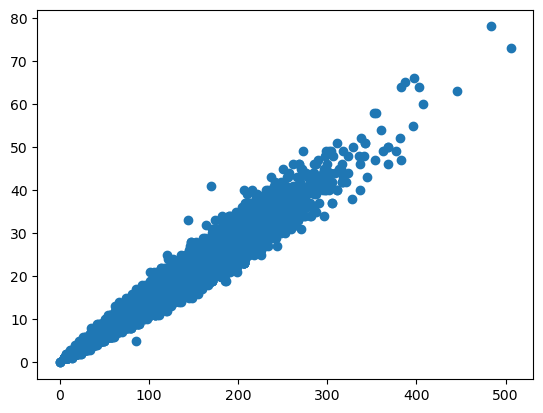

In [63]:
#correlation between char and word
data1=endresult['total_char']
data2=endresult['total_word']

plt.scatter(data1, data2)

In [64]:
# correlation between HS and other HS variables
print(endresult['HS'].corr(endresult['Abusive'])) #0.3685951482849779
 
# correlation 
print(endresult['HS'].corr(endresult['HS_Individual']))
 
# correlation 
print(endresult['HS'].corr(endresult['HS_Group']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Religion']))

# correlation
print(endresult['HS'].corr(endresult['HS_Race']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Physical']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Gender']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Weak']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Moderate']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Strong']))

# correlation 
print(endresult['HS'].corr(endresult['HS_Other'])) #the highest corr

0.3685951482849779
0.7139979591727409
0.4929118556583242
0.2960773927647648
0.24787347305599777
0.18547103980378982
0.18040492224674465
0.6877129423889001
0.4510793099571456
0.22576463773130923
0.7366510083412457


0.18040492224674465
